In [1]:
import umap
import umap.plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from top2vec import Top2Vec
from scipy.special import softmax
from bokeh.plotting import output_file, save

In [2]:
model = Top2Vec.load("./../models/210205 - top2vec.model")
reduced_topics = model.hierarchical_topic_reduction(20)

In [3]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # plotting is currently only implemented for 2d embeddings
    "metric": "cosine",
    "random_state": 42,
}
umap_model = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

---

In [4]:
mappings = pd.read_csv("../data/processed/topic-labels.csv").set_index("topic")["label"].to_dict()

In [5]:
model.labels = np.vectorize(mappings.get)(model.doc_top_reduced)

Text(0.5, 1.0, 'Reduced 2D embeddings: 20 labeled topics')

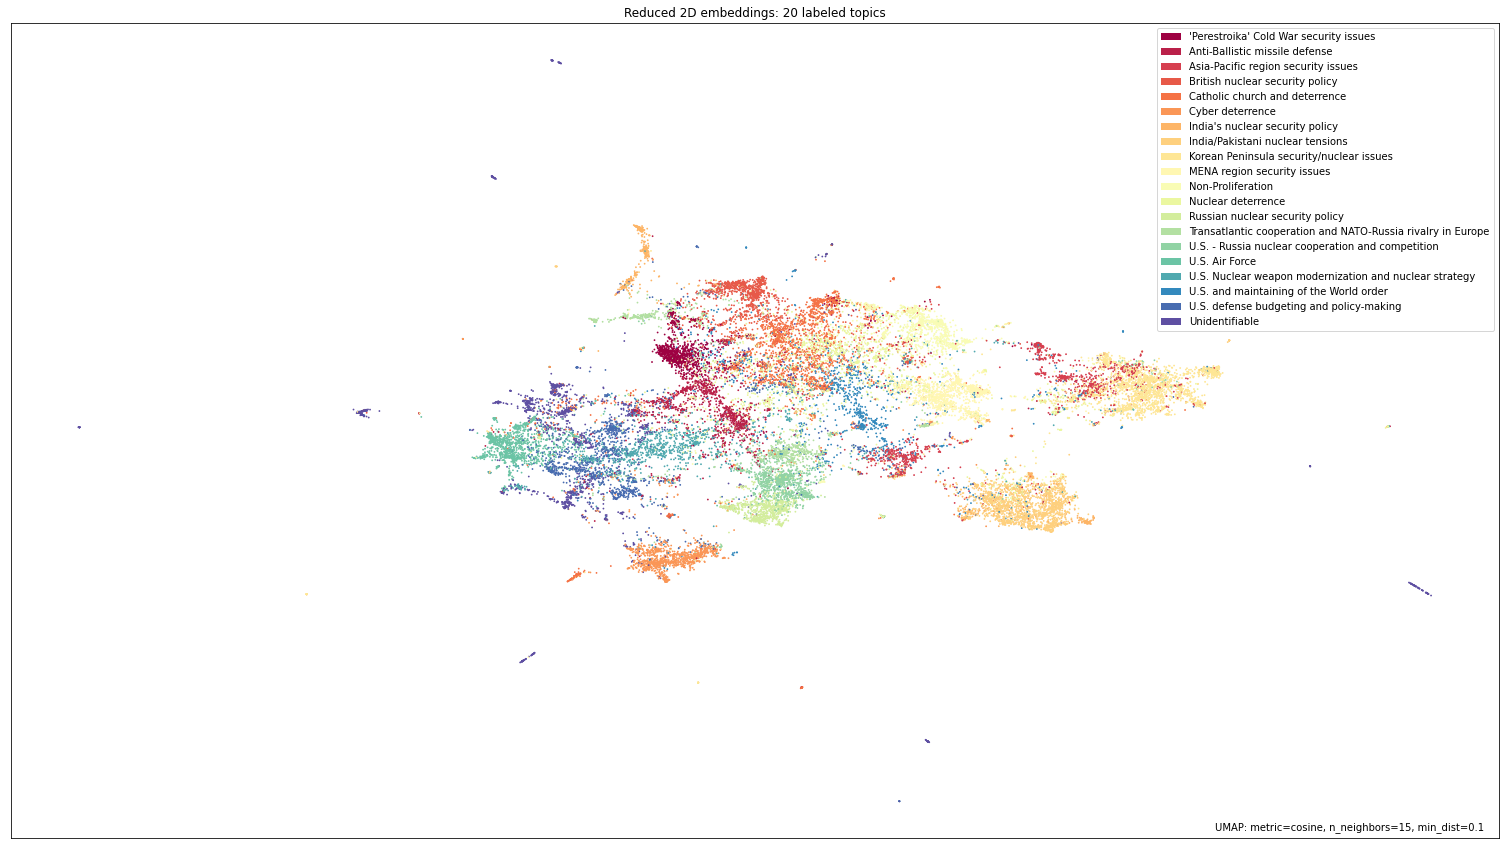

In [6]:
ax = umap.plot.points(umap_model, labels=model.labels, width=1920, height=1080)
ax.set_title(f"Reduced 2D embeddings: 20 labeled topics")
plt.savefig(
    f"./../reports/figures/umap-points-reduced-20-labeled-topics.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

Text(0.5, 1.0, 'Connectivity relationships (weighted graph) of the model on 20 labeled topics')

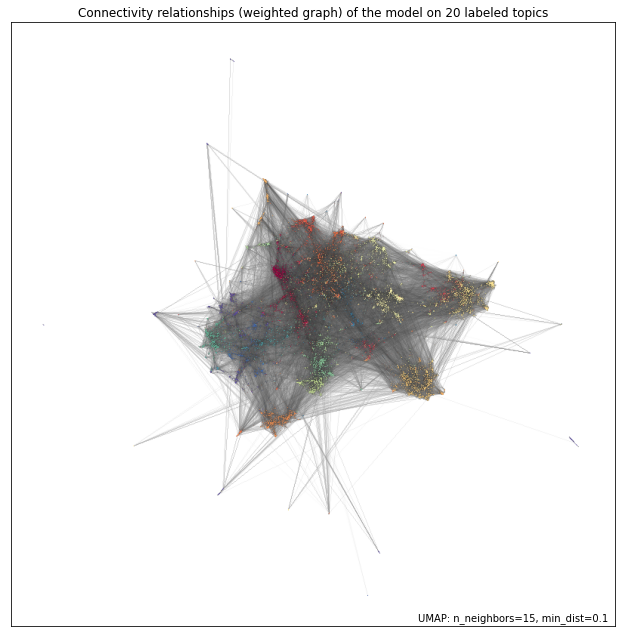

In [7]:
ax = umap.plot.connectivity(
    umap_model, 
    labels=model.labels, 
    show_points=True,  
)
ax.set_title("Connectivity relationships (weighted graph) of the model on 20 labeled topics")
plt.savefig(
    "./../reports/figures/umap-connectivity.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

In [8]:
hover_data = pd.DataFrame({
    "doc_id": model.document_ids,
    "text": [doc[:250] for doc in model.documents],
    "label": model.labels,
    "doc_top": model.doc_top,
    "doc_dist": model.doc_dist,
    "doc_top_reduced": model.doc_top_reduced,
    "doc_dist_reduced": model.doc_dist_reduced
})

In [9]:
p = umap.plot.interactive(umap_model, labels=model.labels, hover_data=hover_data, point_size=2)
output_file("../reports/figures/bokeh.html")
save(p)

---

## Top words

In [46]:
def view_topic_words(topic_num):
    return {
        mappings.get(topic_num): dict(zip(
            model.topic_words_reduced[topic_num],
            softmax(model.topic_word_scores_reduced[topic_num])
        ))
    }

In [51]:
view_topic_words(17)

{'Transatlantic cooperation and NATO-Russia rivalry in Europe': {'nato': 0.02374695,
  'eu': 0.02137295,
  'europe': 0.021277318,
  'european': 0.02121947,
  'russia': 0.02114994,
  'baltic': 0.021127533,
  'europeans': 0.02078677,
  'lisbon': 0.020770287,
  'brussels': 0.02076934,
  'ischinger': 0.02061329,
  'poland': 0.020579701,
  'germany': 0.020549847,
  'efp': 0.02036565,
  'russian': 0.020324793,
  'transatlantic': 0.020297747,
  'enlargement': 0.020217972,
  'warsaw': 0.020079603,
  'ukraine': 0.020074261,
  'natos': 0.020024257,
  'polish': 0.020018175,
  'allies': 0.019986413,
  'atlantic': 0.019941786,
  'eastern': 0.01985726,
  'stoltenberg': 0.019813722,
  'macron': 0.019811876,
  'baltics': 0.01980202,
  'fogh': 0.019733155,
  'lithuania': 0.019677097,
  'moscow': 0.019639228,
  'german': 0.019614113,
  'alliance': 0.019601898,
  'crimea': 0.01956429,
  'merkel': 0.019502042,
  'osce': 0.019455718,
  'continent': 0.019419037,
  'pesco': 0.019408027,
  'romania': 0.019366

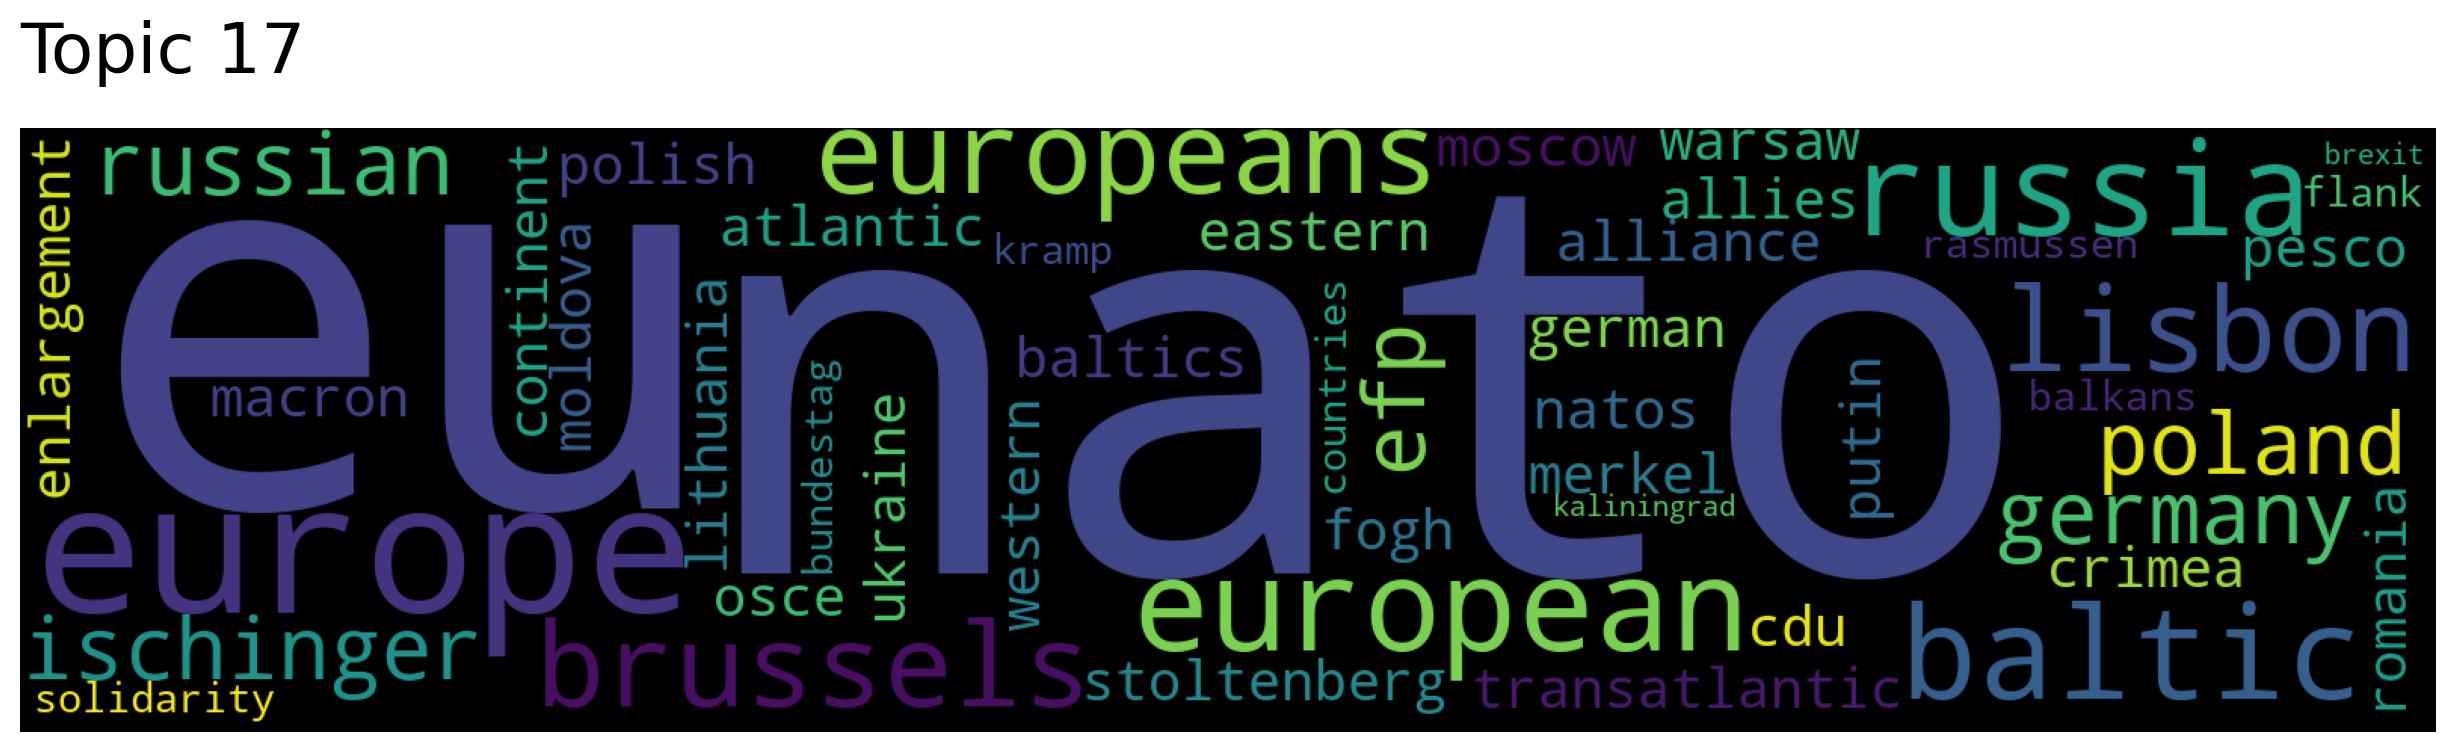

In [53]:
model.generate_topic_wordcloud(17, reduced=True)